<div align=center>

---

# Simulation based on
## "Kernel-nulling for a robust direct interferometric detection of extrasolar planets"
### Frantz Martinache and Michael J. Ireland (2018)

</div>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as U
from src import *

In [13]:
def dot(M,x):
    y = np.zeros((M.shape[0],*x.shape[1:]), dtype=complex)

    for row in range(M.shape[0]):
        for col in range(M.shape[1]):
            y[row] += M[row][col] * x[col]

    return y

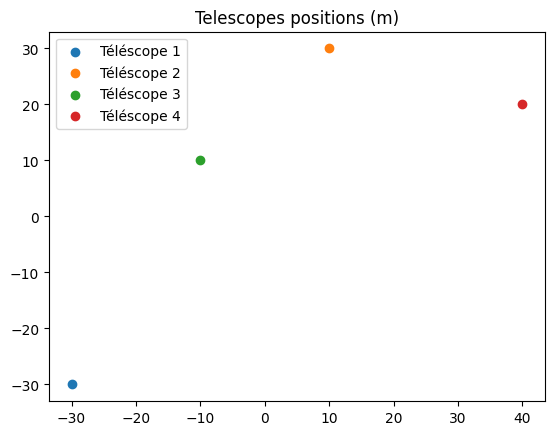

In [14]:
# Reset all the telescopes (avoid having to restart the kernel)
Telescope.all = []

# Idk the real VLT so I just put some very approximative positions
t1 = Telescope(-30*U.m, -30*U.m, image_size=1000, field_width=1*U.arcsec)
t2 = Telescope(10*U.m, 30*U.m, image_size=1000, field_width=1*U.arcsec)
t3 = Telescope(-10*U.m, 10*U.m, image_size=1000, field_width=1*U.arcsec)
t4 = Telescope(40*U.m, 20*U.m, image_size=1000, field_width=1*U.arcsec)

Telescope.plot_position()

# Input

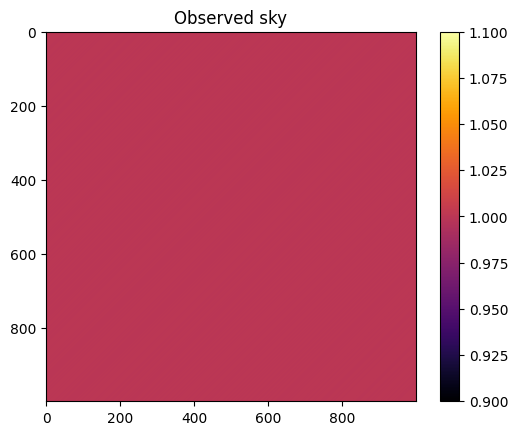

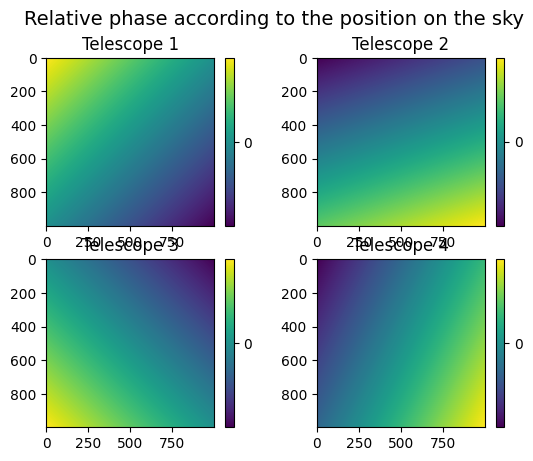

In [15]:
def white_sky(phi,theta):
    return np.ones_like(phi)

for t in Telescope.all:
    t.observe(white_sky, wavelength=1.55*U.um)

t1.plot_intensity()
Telescope.plot_phases()

x = np.array([t1.field.complex, t2.field.complex, t3.field.complex, t4.field.complex])

# Nuller

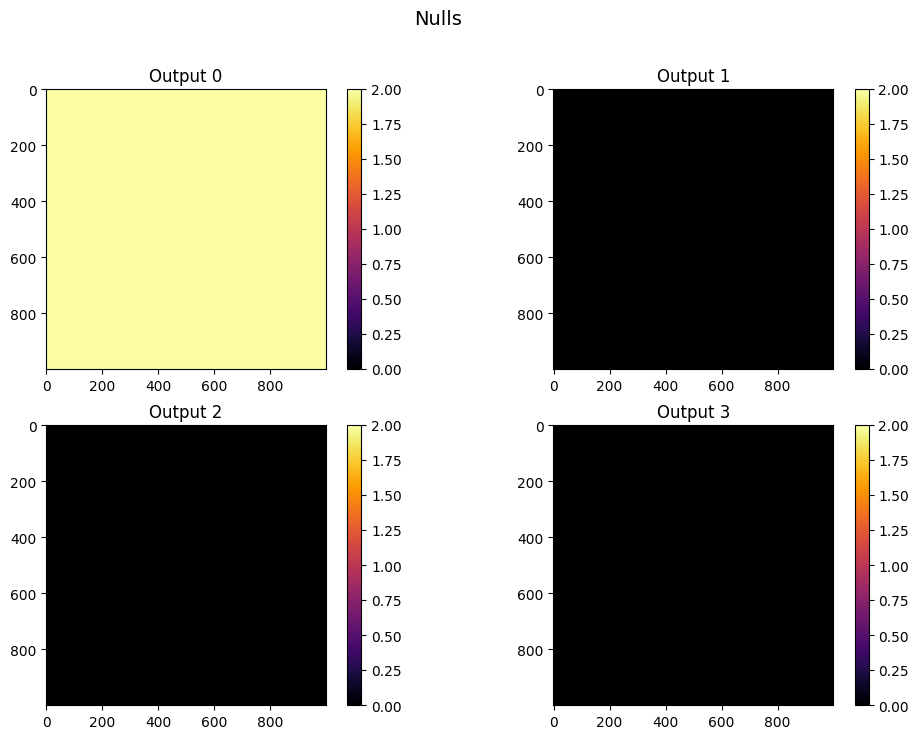

In [16]:
N = 1/np.sqrt(4) * np.array([
        [1,  1,  1,  1],
        [1,  1, -1, -1],
        [1, -1,  1, -1],
        [1, -1, -1,  1]
])

x = dot(N,x)
utils.multi_imshow(x, title="Nulls")

In [17]:
def null_depth(x0, x):
    return np.sum(np.abs(x)) / np.sum(np.abs(x0))

def central_null_depth(x0, x):
    return np.sum(np.abs(x[len(x)//2,len(x)//2])) / np.sum(np.abs(x0[len(x0)//2,len(x0)//2]))

print(f"Central null depths:\n- " + "\n- ".join([f"Null {i}: {central_null_depth(x[0], e):.2f}" for i, e in enumerate(x)]))

Central null depths:
- Null 0: 1.00
- Null 1: 0.00
- Null 2: 0.00
- Null 3: 0.00


# Split & Mix

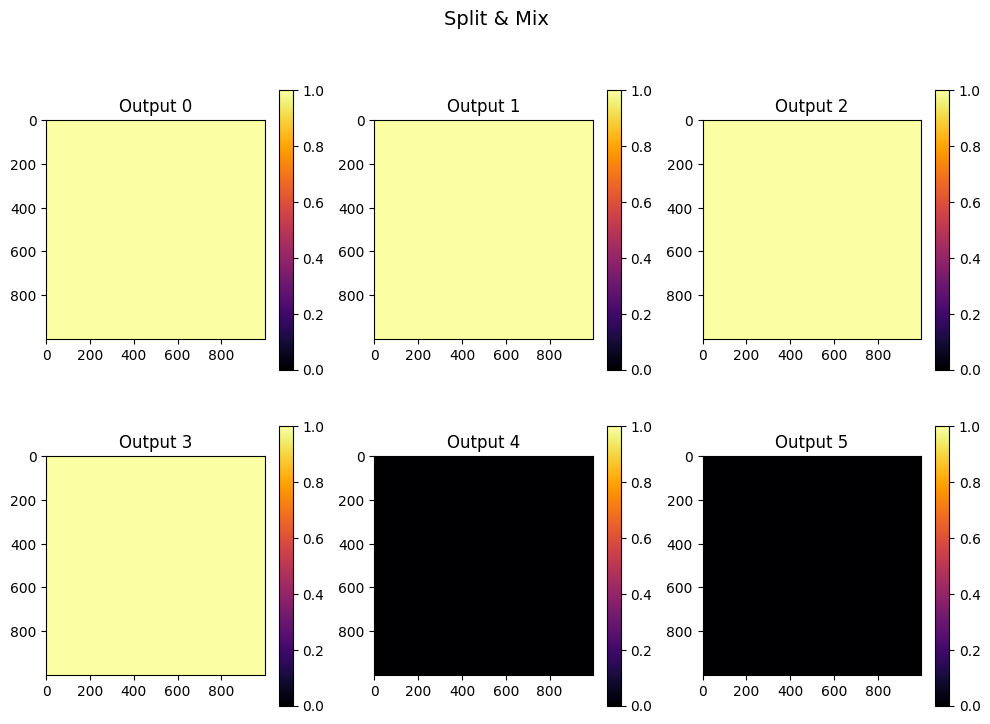

In [18]:
phi = np.pi/2
S = 1/np.sqrt(4) * np.array([
    [1               , np.exp(1j*phi)  , 0             ],
    [-np.exp(-1j*phi), 1               , 0             ],
    [1               , 0               , np.exp(1j*phi)],
    [-np.exp(-1j*phi), 0               , 1             ],
    [0               , 1               , np.exp(1j*phi)],
    [0               , -np.exp(-1j*phi), 1             ]
])

x = dot(S,x)
utils.multi_imshow(x, title="Split & Mix")

# Kernels

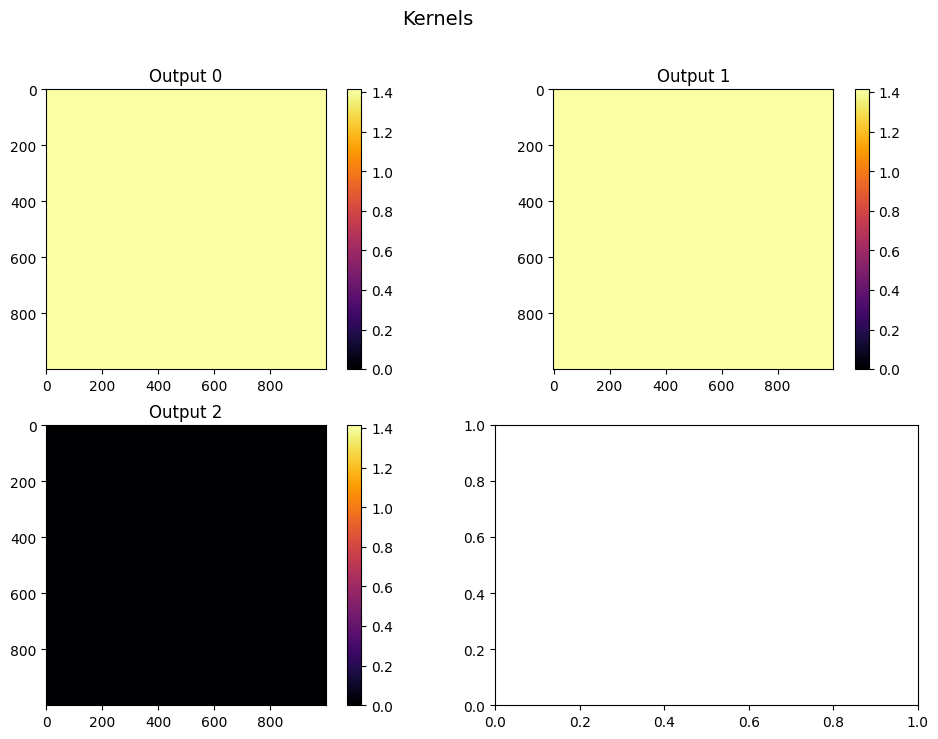

In [19]:
K = np.array([
    [1, -1, 0,  0, 0,  0],
    [0,  0, 1, -1, 0,  0],
    [0,  0, 0,  0, 1, -1]
])

x = dot(K,x)
utils.multi_imshow(x, title="Kernels")

# Cloture de phase

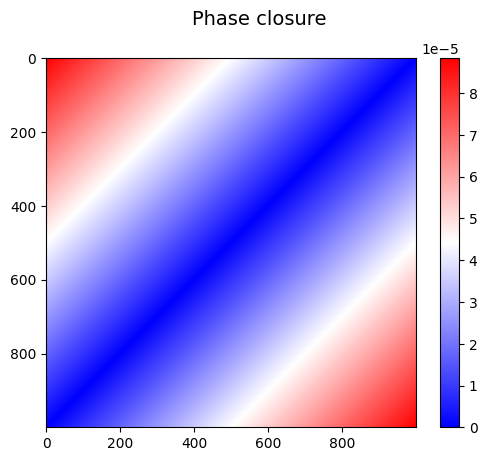

In [20]:
P = np.abs(np.conjugate(x[0]) * x[1] * x[2])

plt.gcf().suptitle(f"Phase closure", fontsize=14)
plt.imshow(P, cmap="bwr")
plt.colorbar()
plt.show()